## Assignments

To close out this checkpoint, you're going to do three assignments. For the first assignment, you'll write up a short answer to a question.  For the second two assignments, you'll do your work in Jupyter notebooks.


Please submit links to all your work below. This is not a graded checkpoint, but you should discuss your solutions with your mentor. Also, when you're done, compare your work to [these example solutions](https://github.com/Thinkful-Ed/machine-learning-regression-problems/blob/master/notebooks/4.solution_understanding_the_relationship.ipynb).

### 1. Interpretation and significance

Suppose that we would like to know how much families in the US are spending on recreation annually. We've estimated the following model:

$$ expenditure = 873 + 0.0012annual\_income + 0.00002annual\_income^2 - 223.57have\_kids $$

*expenditure* is the annual spending on recreation in US dollars, *annual_income* is the annual income in US dollars, and *have_kids* is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer.

Those who have kids spend an avg of 223.57 less than those who don't. As annual income increases however, expenditure increases by the a factor of .0012, and an exponential factor of .00002.

P-values for the t-tests for significance for these coefficients would be nice.

### 2. Weather model

In this exercise, you'll work with the historical temperature data from the previous checkpoint. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* First, load the dataset from the **weatherinszeged** table from Thinkful's database.
* Build a linear regression model where your target variable is the difference between the *apparenttemperature* and the *temperature*. As explanatory variables, use *humidity* and *windspeed*. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables? 
* Next, include the interaction of *humidity* and *windspeed* to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for *humidity* and *windspeed* change? Interpret the estimated coefficients.

In [75]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

import ds_useful

[My Useful Data Science Functions](https://github.com/cobyoram/python-for-data-scientists/blob/master/ds_useful.py)

In [76]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'
table = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

data = pd.read_sql_query('SELECT * FROM {}'.format(table), con=engine)

engine.dispose()

In [77]:
weather = data.copy()

In [78]:
weather.head()

date        summary preciptype  temperature  \
0 2006-03-31 22:00:00+00:00  Partly Cloudy       rain     9.472222   
1 2006-03-31 23:00:00+00:00  Partly Cloudy       rain     9.355556   
2 2006-04-01 00:00:00+00:00  Mostly Cloudy       rain     9.377778   
3 2006-04-01 01:00:00+00:00  Partly Cloudy       rain     8.288889   
4 2006-04-01 02:00:00+00:00  Mostly Cloudy       rain     8.755556   

   apparenttemperature  humidity  windspeed  windbearing  visibility  \
0             7.388889      0.89    14.1197        251.0     15.8263   
1             7.227778      0.86    14.2646        259.0     15.8263   
2             9.377778      0.89     3.9284        204.0     14.9569   
3             5.944444      0.83    14.1036        269.0     15.8263   
4             6.977778      0.83    11.0446        259.0     15.8263   

   loudcover  pressure                       dailysummary  
0        0.0   1015.13  Partly cloudy throughout the day.  
1        0.0   1015.63  Partly cloudy throughout the day.  
2        0.0   1015.94  Partly cloudy throughout the day.  
3        0.0   1016.41  Partly cloudy throughout the day.  
4        0.0   1016.51  Partly cloudy throughout the day.

In [79]:
# Feature engineering (given by assignment)

# make a target variable, difference between actual and apparent temperature
target = pd.DataFrame().assign(temperaturediff=weather['temperature'] - weather['apparenttemperature'])

#make features with given variables
features = weather[['humidity', 'windspeed']]
#
features.head()

humidity  windspeed
0      0.89    14.1197
1      0.86    14.2646
2      0.89     3.9284
3      0.83    14.1036
4      0.83    11.0446

In [80]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

features = sm.add_constant(features)

X_train, X_test, Y_train, Y_test = train_test_split(features, target)

lrm = sm.OLS(Y_train, X_train)
results = lrm.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        temperaturediff   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                 1.490e+04
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:37:22   Log-Likelihood:            -1.2778e+05
No. Observations:               72339   AIC:                         2.556e+05
Df Residuals:                   72336   BIC:                         2.556e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4544      0.024   -101.107      0.000      -2.502      -2.407
humidity       3.0391      0.028    109.885      0.000       2.985       3.093
windspeed      0.1203      0.001    154.340      0.000       0.119       0.122
==============================================================================
Omnibus:                     2914.400   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3436.422
Skew:                           0.470   Prob(JB):                         0.00
Kurtosis:                       3.505   Cond. No.                         88.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients are statistically significant, and seem to be what we'd expect. As humidity increases by a unit, we expect the difference between actual temperature and how it feels to go up as well, and we expect the windspeed to have a similar effect. The relationships between target and the explanatory variables is a positive, linear relationship

In [81]:
features = features.assign(windspeedhumidity = features['windspeed'] * features['humidity'])

X_train, X_test, Y_train, Y_test = train_test_split(features, target)

lrm = sm.OLS(Y_train, X_train)
results = lrm.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        temperaturediff   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                 1.238e+04
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:37:22   Log-Likelihood:            -1.2516e+05
No. Observations:               72339   AIC:                         2.503e+05
Df Residuals:                   72335   BIC:                         2.504e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0679      0.039     -1.758      0.079      -0.144       0.008
humidity             -0.1913      0.050     -3.853      0.000      -0.289      -0.094
windspeed            -0.0909      0.003    -31.979      0.000      -0.097      -0.085
windspeedhumidity     0.2968      0.004     76.456      0.000       0.289       0.304
==============================================================================
Omnibus:                     3638.262   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6845.293
Skew:                           0.383   Prob(JB):                         0.00
Kurtosis:                       4.298   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This changed the signs of the coefficients. According to this humidity, when humidity goes up, the perceived difference increases negatively, and same with windspeed. It aslo states that when windspeed and humidity go up, difference goes up. This actually makes more sense, because when humidity and wind are combined, we can expect to have chiller-feeling temperatures than if just humity was up(which could actually make it feel warmer.)

###  3. House prices model

In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database.
* Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?
* Now, exclude the insignificant features from your model. Did anything change?
* Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?
* Do the results sound reasonable to you? If not, try to explain the potential reasons.

In [82]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
table = postgres_db

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

data = pd.read_sql_query('SELECT * FROM {}'.format(table), con=engine)

engine.dispose()

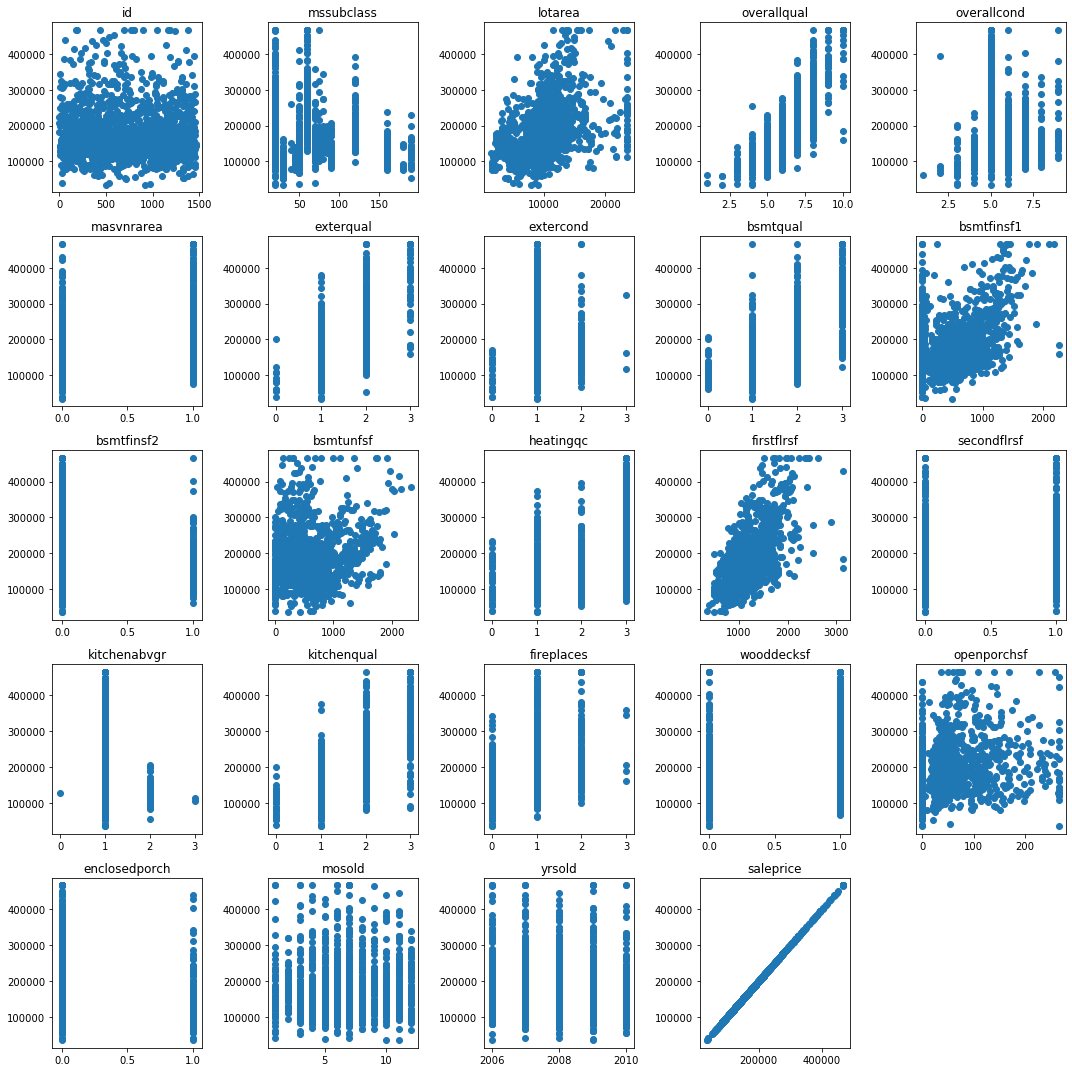

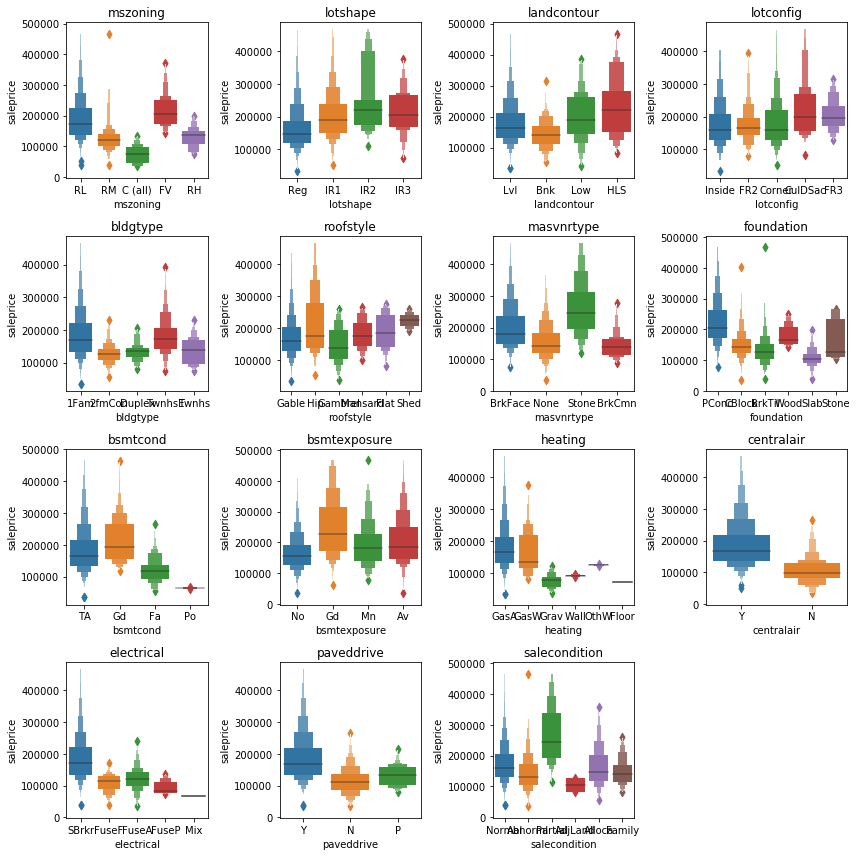

In [83]:
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns
import math

prices = data.copy()
target_name = 'saleprice'

# Remove correlated features with correlations >= .7 with each other
ds_useful.remove_correlated_features(prices, target_name, .5)


# Drop the rest of missing columns, rather than interpolating
missings = ds_useful.missingness_summary(prices)
prices.drop(missings.loc[missings > 5].index, axis=1, inplace=True)

# # Get percentages of repeated zeros in data and Remove columns with more htan 90% 0
repeats = ds_useful.repeats_summary(prices, value=0)
prices.drop(repeats.loc[repeats > 90].index, axis=1, inplace=True)

# Now binary encode data with a lot of repeated zeros
repeats = ds_useful.repeats_summary(prices, value=0)
num_binaries = repeats.loc[repeats > 50].index
for col in num_binaries:
    prices[col] = np.where(prices[col] == 0, 0, 1)

# Do the same with repeated modes (more than 90% is mode)
cat_repeats = ds_useful.repeats_summary(prices, value_agg='mode')
prices.drop(cat_repeats.loc[cat_repeats > 90].index, axis=1)

# Get repeating zeros again
repeats = ds_useful.repeats_summary(prices, value=0)
num_binaries = repeats.loc[repeats > 50].index
for col in num_binaries:
    prices[col] = np.where(prices[col] == prices[col].mode().iloc[0], 0, 1)

# Get outliers
outliers = ds_useful.outliers_summary(prices, 3)

# Reduce outliers list to those that are continuous
for col in outliers.index:
    if prices[col].nunique() < 20:
        outliers.drop(col, inplace=True)

# Winsorize the data
for column in outliers.index:
    percentiles = ds_useful.get_percentiles(prices, column, 3)
    prices[column] = stats.mstats.winsorize(prices[column], percentiles)

quality_map = {'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3}
quality_columns = ['kitchenqual', 'exterqual', 'bsmtqual', 'heatingqc', 'extercond']
for col in quality_columns:
    prices[col] = prices[col].map(quality_map)
prices

for col in quality_columns:
    prices.drop(prices.loc[prices[col] == 'Po', col].index, axis=0, inplace=True)

def get_significant_category_columns(df, target, sig=True):
    sig_cols = set()
    for col in df.select_dtypes('object').columns:
        ucats = []
        for ucat in df[col].unique():
            ucats.append(df.loc[df[col] == ucat, target])
        anova = stats.f_oneway(*ucats)
        if anova.pvalue < .05 and sig:
            sig_cols.update([col])
        if anova.pvalue >= .05 and not sig:
            sig_cols.update([col])
    return sig_cols

insig_cols = get_significant_category_columns(prices, 'saleprice', sig=False)
prices.drop(insig_cols, axis=1, inplace=True)

for cat_var in prices.select_dtypes('object').columns:
    if len(prices[cat_var].unique()) > 6:
        prices.drop(cat_var, axis=1, inplace=True)

def plot_cat(df, col, y):
    sns.boxenplot(x=df[col], y=y)

def plot_num(df, col, y):
    plt.scatter(df[col], y)

ds_useful.make_subplots(prices.select_dtypes('number'), plot_num, [prices['saleprice']])
ds_useful.make_subplots(prices.select_dtypes('object'), plot_cat, [prices['saleprice']])

# Drop ones with too many unique
# Sort by std take top stuff
#       Scalaraze them
#       take mean of each category within feature
#       Take std of each average and sort by std for everything

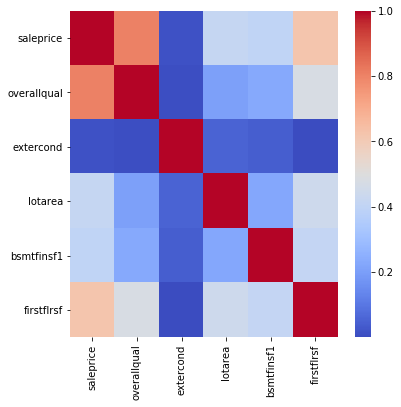

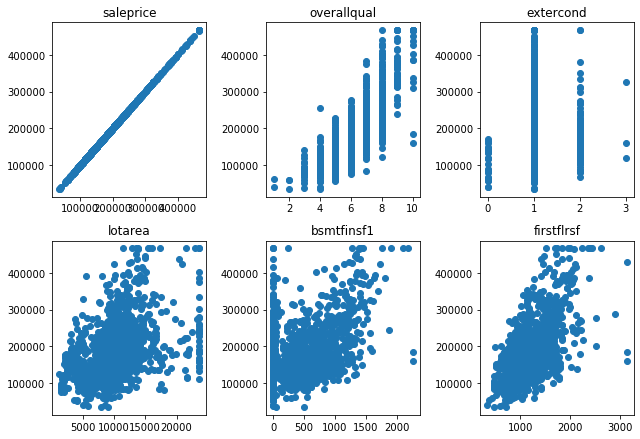

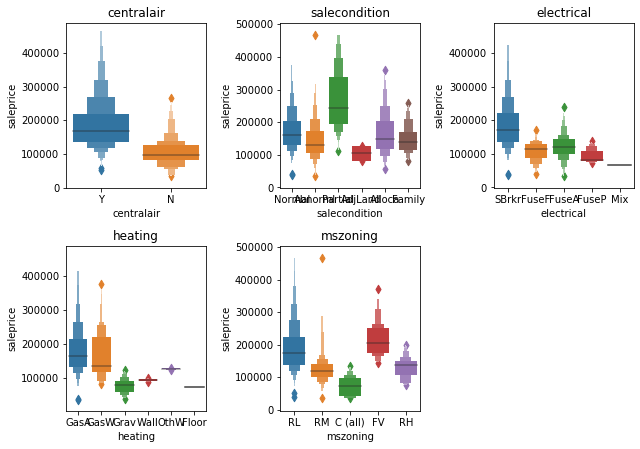

In [84]:
# Upon visual inspection of leftover features, identify ones to keep


keep_cols = ['saleprice', 'overallqual', 'extercond', 'lotarea', 'bsmtfinsf1', 'firstflrsf', 'centralair', 'salecondition', 'electrical', 'heating', 'mszoning']

prices = prices[keep_cols]

plt.figure(figsize=(6,6))
sns.heatmap(prices.corr(), cmap='coolwarm')
plt.show()

def plot_cat(df, col, y):
    sns.boxenplot(x=df[col], y=y)

def plot_num(df, col, y):
    plt.scatter(df[col], y)

ds_useful.make_subplots(prices.select_dtypes('number'), plot_num, [prices['saleprice']])
ds_useful.make_subplots(prices.select_dtypes('object'), plot_cat, [prices['saleprice']])
# Encode Centralair to make sense

In [95]:
dummy_prices = pd.get_dummies(prices.select_dtypes('object'),drop_first=True)
house_prices = pd.concat([prices.select_dtypes('number'), dummy_prices], axis=1)
house_prices.dropna(axis=0, inplace=True)

ds_useful.missingness_summary(house_prices)

mszoning_RM              0.0
salecondition_Partial    0.0
overallqual              0.0
extercond                0.0
lotarea                  0.0
bsmtfinsf1               0.0
firstflrsf               0.0
centralair_Y             0.0
salecondition_AdjLand    0.0
salecondition_Alloca     0.0
salecondition_Family     0.0
salecondition_Normal     0.0
electrical_FuseF         0.0
mszoning_RL              0.0
electrical_FuseP         0.0
electrical_Mix           0.0
electrical_SBrkr         0.0
heating_GasA             0.0
heating_GasW             0.0
heating_Grav             0.0
heating_OthW             0.0
heating_Wall             0.0
mszoning_FV              0.0
mszoning_RH              0.0
saleprice                0.0
dtype: float64

In [98]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

y = house_prices['saleprice']
X = house_prices.drop('saleprice', axis=1)
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)
lrm = sm.OLS(y_train, X_train)
results = lrm.fit()
# help(results.summary)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     207.5
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:18:57   Log-Likelihood:                -13741.
No. Observations:                1167   AIC:                         2.753e+04
Df Residuals:                    1142   BIC:                         2.766e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -8.6e+04   3.39e+04     -2.539      0.011   -1.52e+05   -1.95e+04
overallqual            3.181e+04    855.472     37.179      0.000    3.01e+04    3.35e+04
extercond                93.9579   2670.192      0.035      0.972   -5145.076    5332.991
lotarea                   3.1500      0.268     11.759      0.000       2.624       3.676
bsmtfinsf1               25.3772      2.423     10.473      0.000      20.623      30.131
firstflrsf               39.2656      3.385     11.601      0.000      32.625      45.907
centralair_Y           3325.7151   4734.166      0.702      0.483   -5962.924    1.26e+04
salecondition_AdjLand -1.832e+04   2.62e+04     -0.698      0.485   -6.98e+04    3.32e+04
salecondition_Alloca   1.209e+04   1.08e+04      1.123      0.262   -9031.729    3.32e+04
salecondition_Family  -7178.8543   8777.622     -0.818      0.414   -2.44e+04       1e+04
salecondition_Normal   1.065e+04   3776.249      2.821      0.005    3243.983    1.81e+04
salecondition_Partial  3.914e+04   5056.006      7.741      0.000    2.92e+04    4.91e+04
electrical_FuseF      -1555.3641   8389.568     -0.185      0.853    -1.8e+04    1.49e+04
electrical_FuseP       2766.4091   2.65e+04      0.104      0.917   -4.93e+04    5.48e+04
electrical_Mix        -4.353e+04   3.24e+04     -1.345      0.179   -1.07e+05       2e+04
electrical_SBrkr        835.4454   3972.313      0.210      0.833   -6958.405    8629.296
heating_GasA          -3.404e+04   3.22e+04     -1.058      0.290   -9.72e+04    2.91e+04
heating_GasW          -2.917e+04    3.3e+04     -0.883      0.378    -9.4e+04    3.57e+04
heating_Grav          -3.541e+04   3.51e+04     -1.009      0.313   -1.04e+05    3.34e+04
heating_OthW          -6.746e+04   4.51e+04     -1.495      0.135   -1.56e+05    2.11e+04
heating_Wall          -8033.8924   3.69e+04     -0.218      0.828   -8.05e+04    6.44e+04
mszoning_FV            1.369e+04   1.21e+04      1.134      0.257      -1e+04    3.74e+04
mszoning_RH            6802.8765   1.44e+04      0.471      0.637   -2.15e+04    3.51e+04
mszoning_RL            2353.6098   1.12e+04      0.211      0.833   -1.95e+04    2.42e+04
mszoning_RM           -2322.8670   1.13e+04     -0.206      0.837   -2.44e+04    1.98e+04
==============================================================================
Omnibus:                       68.626   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.936
Skew:                           0.410   Prob(JB):                     1.00e-28
Kurtosis:                       4.407   Cond. No.                     9.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [101]:
drop_cols = ['extercond', 'centralair_Y', 'salecondition_AdjLand', 'salecondition_Alloca', 'salecondition_Family', 'electrical_FuseF', 'electrical_FuseP', 'electrical_Mix', 'electrical_SBrkr', 'heating_GasA', 'heating_GasW', 'heating_Grav', 'heating_OthW', 'heating_Wall', 'heating_Wall', 'mszoning_FV', 'mszoning_RH', 'mszoning_RL', 'mszoning_RM']

X_train_simp = X_train.drop(drop_cols, axis=1)
X_test_simp = X_test.drop(drop_cols, axis=1)

lrm_simp = sm.OLS(y_train, X_train_simp)
results_simp = lrm_simp.fit()

results_simp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     824.4
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:26:43   Log-Likelihood:                -13751.
No. Observations:                1167   AIC:                         2.752e+04
Df Residuals:                    1160   BIC:                         2.755e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.184e+05   5276.023    -22.438      0.000   -1.29e+05   -1.08e+05
overallqual            3.242e+04    792.606     40.898      0.000    3.09e+04     3.4e+04
lotarea                   3.1831      0.251     12.674      0.000       2.690       3.676
bsmtfinsf1               25.9202      2.392     10.837      0.000      21.228      30.613
firstflrsf               38.8182      3.314     11.713      0.000      32.316      45.320
salecondition_Normal   1.142e+04   3219.364      3.548      0.000    5104.444    1.77e+04
salecondition_Partial  4.102e+04   4643.261      8.835      0.000    3.19e+04    5.01e+04
==============================================================================
Omnibus:                       58.720   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.955
Skew:                           0.365   Prob(JB):                     5.96e-24
Kurtosis:                       4.291   Cond. No.                     6.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now all of the columns have statistically significant affects coefficients. The salecondition_normal column (whether the house is a normal condition or a special case) increases the saleprice by about 10,000 on average, while a partial condition increases the price by 40,000.
An increase in overall quality increases the saleprice by 30,000. 
Without domain knowledge to back this up, it all sounds reasonable to me. However, I would have expected lotarea to have a more significant effect. It's interesting that sqft has more effect than lotarea.